In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
import pandas as pd

data = pd.read_csv('mnist_784_csv.csv')

x = data.iloc[:,0:784]
y = data['class']

In [3]:
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [6]:
x_train.shape

(49000, 784)

In [7]:
x_test.shape

(21000, 784)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train = x_train.to_numpy().reshape(x_train.shape[0],28*28)

In [10]:
x_test = x_test.to_numpy().reshape(x_test.shape[0],28*28)

In [11]:
x_test.shape

(21000, 784)

In [12]:
x_train.shape

(49000, 784)

In [13]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0,size=x_test.shape)

In [14]:
# It helps to prevent unexpected or unrealistic values that might be introduced during the process of adding noise or other
# transformations to the data.
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [15]:
x_train_noisy.shape

(49000, 784)

In [16]:
x_test_noisy.shape

(21000, 784)

In [18]:
X_Train = x_train.reshape(x_train.shape[0],28,28)
X_Test = x_test.reshape(x_test.shape[0],28,28)

In [19]:
X_Train.shape

(49000, 28, 28)

In [20]:
X_Test.shape

(21000, 28, 28)

In [21]:
model = Sequential()
model.add(Dense(500, input_shape = (28*28,), activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(784, activation = 'sigmoid'))

In [22]:
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [23]:
H = model.fit(x_train_noisy, x_train, epochs = 20, batch_size = 100)

Epoch 1/20
490/490 [==============================] - 25s 38ms/step - loss: 0.0339
Epoch 2/20
490/490 [==============================] - 20s 42ms/step - loss: 0.0145
Epoch 3/20
490/490 [==============================] - 12s 25ms/step - loss: 0.0114
Epoch 4/20
490/490 [==============================] - 10s 20ms/step - loss: 0.0098
Epoch 5/20
490/490 [==============================] - 9s 19ms/step - loss: 0.0088
Epoch 6/20
490/490 [==============================] - 9s 19ms/step - loss: 0.0082
Epoch 7/20
490/490 [==============================] - 11s 22ms/step - loss: 0.0077
Epoch 8/20
490/490 [==============================] - 10s 21ms/step - loss: 0.0073
Epoch 9/20
490/490 [==============================] - 9s 19ms/step - loss: 0.0069
Epoch 10/20
490/490 [==============================] - 9s 18ms/step - loss: 0.0067
Epoch 11/20
490/490 [==============================] - 8s 17ms/step - loss: 0.0064
Epoch 12/20
490/490 [==============================] - 9s 17ms/step - loss: 0.0063
Epoch 1

In [24]:
pred = model.predict(x_test)

657/657 [==============================] - 9s 12ms/step


In [25]:
pred = pred.reshape(pred.shape[0], 28, 28)

In [26]:
X_TEST_NOISY = x_test_noisy.reshape(x_test_noisy.shape[0],28,28)

input


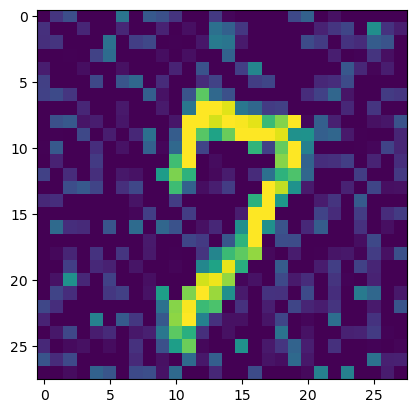

In [27]:
import random

n=random.randint(0,1000)
print("input")
plt.imshow(X_TEST_NOISY[n])

output


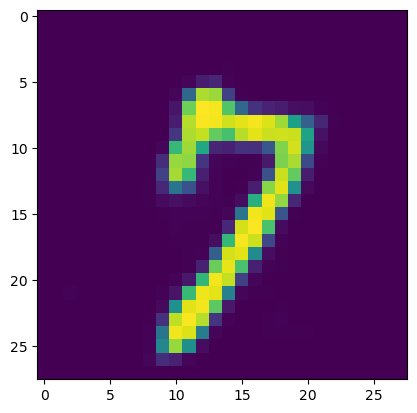

In [28]:
print("output")
plt.imshow(pred[n])

target


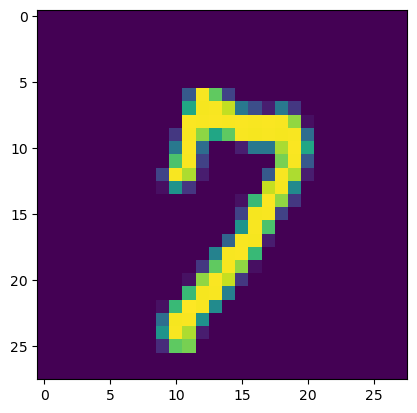

In [29]:
print("target")
plt.imshow(X_Test[n])